## 01. Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [2]:
#import party_laws

path = r'/Users/juliewhitton/Desktop/Personal Project/'
df = pd.read_csv(os.path.join(path, 'Data', 'Final Data', 'pol_laws.csv'))
df.head()

,state,year,state_control,registration_req,open_carry_legal,open_carry_permit_req,permit_req_purchase,felons_may_own,restraining_order_may_own,dv_offender_may_own,violent_offender_may_own,conv_stalker_may_own,dealer_req_license,bg_check_required,concealed_carry_permit_req,guns_on_college_campus,guns_at_elemen_sch,assault_weapon_ban
0,AL,2014,Rep,No,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
1,AK,2014,Rep,No,Yes,No,No,No,Yes,Yes,Yes,Yes,No,No,No,Yes,No,No
2,AZ,2014,Rep,No,Yes,No,No,No,Yes,No,Yes,No,No,No,No,Yes,Yes,No
3,AR,2014,Divided,No,Yes,No,No,No,Yes,Yes,Yes,Yes,No,No,Yes,No,No,No
4,CA,2014,Dem,No,No,Yes,Yes,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes


In [3]:
df.shape

(204, 18)

## 02. Clean DF

In [4]:
#get value counts for all cols

for col in df.columns:
    print('-' * 40 + col + '-' * 40 , end=' - ')
    display(df[col].value_counts().head(10))

----------------------------------------state---------------------------------------- - 

AL    4
RI    4
NH    4
NJ    4
NM    4
NY    4
NC    4
ND    4
OH    4
OK    4
Name: state, dtype: int64

----------------------------------------year---------------------------------------- - 

2014    51
2015    51
2016    51
2017    51
Name: year, dtype: int64

----------------------------------------state_control---------------------------------------- - 

Rep        93
Divided    67
Dem        38
Dem*        2
Name: state_control, dtype: int64

----------------------------------------registration_req---------------------------------------- - 

No     188
Yes     16
Name: registration_req, dtype: int64

----------------------------------------open_carry_legal---------------------------------------- - 

Yes    166
No      38
Name: open_carry_legal, dtype: int64

----------------------------------------open_carry_permit_req---------------------------------------- - 

No     128
Yes     76
Name: open_carry_permit_req, dtype: int64

----------------------------------------permit_req_purchase---------------------------------------- - 

No     148
Yes     56
Name: permit_req_purchase, dtype: int64

----------------------------------------felons_may_own---------------------------------------- - 

No     152
Yes     52
Name: felons_may_own, dtype: int64

----------------------------------------restraining_order_may_own---------------------------------------- - 

No     104
Yes    100
Name: restraining_order_may_own, dtype: int64

----------------------------------------dv_offender_may_own---------------------------------------- - 

No     108
Yes     96
Name: dv_offender_may_own, dtype: int64

----------------------------------------violent_offender_may_own---------------------------------------- - 

Yes    136
No      68
Name: violent_offender_may_own, dtype: int64

----------------------------------------conv_stalker_may_own---------------------------------------- - 

Yes    139
No      65
Name: conv_stalker_may_own, dtype: int64

----------------------------------------dealer_req_license---------------------------------------- - 

No     144
Yes     60
Name: dealer_req_license, dtype: int64

----------------------------------------bg_check_required---------------------------------------- - 

No     127
Yes     77
Name: bg_check_required, dtype: int64

----------------------------------------concealed_carry_permit_req---------------------------------------- - 

Yes    172
No      32
Name: concealed_carry_permit_req, dtype: int64

----------------------------------------guns_on_college_campus---------------------------------------- - 

Yes    128
No      76
Name: guns_on_college_campus, dtype: int64

----------------------------------------guns_at_elemen_sch---------------------------------------- - 

No     140
Yes     64
Name: guns_at_elemen_sch, dtype: int64

----------------------------------------assault_weapon_ban---------------------------------------- - 

No     176
Yes     28
Name: assault_weapon_ban, dtype: int64

In [5]:
#make party values uniform

df['state_control'].replace({'Dem*' : 'Dem'}, inplace = True)

In [6]:
#check for missing values

df.isna().sum()

state                         0
year                          0
state_control                 4
registration_req              0
open_carry_legal              0
open_carry_permit_req         0
permit_req_purchase           0
felons_may_own                0
restraining_order_may_own     0
dv_offender_may_own           0
violent_offender_may_own      0
conv_stalker_may_own          0
dealer_req_license            0
bg_check_required             0
concealed_carry_permit_req    0
guns_on_college_campus        0
guns_at_elemen_sch            0
assault_weapon_ban            0
dtype: int64

In [7]:
#get location of missing values

df.loc[pd.isna(df['state_control']), :].index

Int64Index([26, 76, 126, 176], dtype='int64')

In [8]:
#view rows with missing values

df.iloc[[26, 76, 126, 176]]

,state,year,state_control,registration_req,open_carry_legal,open_carry_permit_req,permit_req_purchase,felons_may_own,restraining_order_may_own,dv_offender_may_own,violent_offender_may_own,conv_stalker_may_own,dealer_req_license,bg_check_required,concealed_carry_permit_req,guns_on_college_campus,guns_at_elemen_sch,assault_weapon_ban
26,NE,2014,NaN,No,Yes,No,Yes,No,Yes,No,Yes,Yes,No,Yes,Yes,No,No,No
76,NE,2015,NaN,No,Yes,No,Yes,No,Yes,No,Yes,Yes,No,Yes,Yes,No,No,No
126,NE,2016,NaN,No,Yes,No,Yes,No,Yes,No,Yes,Yes,No,Yes,Yes,No,No,No
176,NE,2017,NaN,No,Yes,No,Yes,No,Yes,No,Yes,Yes,No,Yes,Yes,No,No,No


In [9]:
#replace NaNs with correct values 

values = {'state_control': 'Rep'}
df.fillna(value = values, inplace = True)

In [10]:
df.isna().sum()

state                         0
year                          0
state_control                 0
registration_req              0
open_carry_legal              0
open_carry_permit_req         0
permit_req_purchase           0
felons_may_own                0
restraining_order_may_own     0
dv_offender_may_own           0
violent_offender_may_own      0
conv_stalker_may_own          0
dealer_req_license            0
bg_check_required             0
concealed_carry_permit_req    0
guns_on_college_campus        0
guns_at_elemen_sch            0
assault_weapon_ban            0
dtype: int64

## 03. Create 'total_laws' and 'law_strength' Columns

In [11]:
#replace Y/N values in law cols with 0 or 1. 1 indicates the presence of a law that strengthens gun control.

df.loc[df['registration_req'] == 'Yes', 'registration_req'] = 1
df.loc[df['registration_req'] == 'No', 'registration_req'] = 0
df.loc[df['open_carry_legal'] == 'Yes', 'open_carry_legal'] = 0
df.loc[df['open_carry_legal'] == 'No', 'open_carry_legal'] = 1
df.loc[df['open_carry_permit_req'] == 'Yes', 'open_carry_permit_req'] = 1
df.loc[df['open_carry_permit_req'] == 'No', 'open_carry_permit_req'] = 0
df.loc[df['permit_req_purchase'] == 'Yes', 'permit_req_purchase'] = 1
df.loc[df['permit_req_purchase'] == 'No', 'permit_req_purchase'] = 0
df.loc[df['felons_may_own'] == 'Yes', 'felons_may_own'] = 0
df.loc[df['felons_may_own'] == 'No', 'felons_may_own'] = 1
df.loc[df['restraining_order_may_own'] == 'Yes', 'restraining_order_may_own'] = 0
df.loc[df['restraining_order_may_own'] == 'No', 'restraining_order_may_own'] = 1
df.loc[df['dv_offender_may_own'] == 'Yes', 'dv_offender_may_own'] = 0
df.loc[df['dv_offender_may_own'] == 'No', 'dv_offender_may_own'] = 1
df.loc[df['violent_offender_may_own'] == 'Yes', 'violent_offender_may_own'] = 0
df.loc[df['violent_offender_may_own'] == 'No', 'violent_offender_may_own'] = 1
df.loc[df['conv_stalker_may_own'] == 'Yes', 'conv_stalker_may_own'] = 0
df.loc[df['conv_stalker_may_own'] == 'No', 'conv_stalker_may_own'] = 1
df.loc[df['dealer_req_license'] == 'Yes', 'dealer_req_license'] = 1
df.loc[df['dealer_req_license'] == 'No', 'dealer_req_license'] = 0
df.loc[df['bg_check_required'] == 'Yes', 'bg_check_required'] = 1
df.loc[df['bg_check_required'] == 'No', 'bg_check_required'] = 0
df.loc[df['concealed_carry_permit_req'] == 'Yes', 'concealed_carry_permit_req'] = 1
df.loc[df['concealed_carry_permit_req'] == 'No', 'concealed_carry_permit_req'] = 0
df.loc[df['guns_on_college_campus'] == 'Yes', 'guns_on_college_campus'] = 0
df.loc[df['guns_on_college_campus'] == 'No', 'guns_on_college_campus'] = 1
df.loc[df['guns_at_elemen_sch'] == 'Yes', 'guns_at_elemen_sch'] = 0
df.loc[df['guns_at_elemen_sch'] == 'No', 'guns_at_elemen_sch'] = 1
df.loc[df['assault_weapon_ban'] == 'Yes', 'assault_weapon_ban'] = 1
df.loc[df['assault_weapon_ban'] == 'No', 'assault_weapon_ban'] = 0

In [12]:
#view value counts for all cols

for col in df.columns:
    print('-' * 40 + col + '-' * 40 , end=' - ')
    display(df[col].value_counts().head(10))

----------------------------------------state---------------------------------------- - 

AL    4
RI    4
NH    4
NJ    4
NM    4
NY    4
NC    4
ND    4
OH    4
OK    4
Name: state, dtype: int64

----------------------------------------year---------------------------------------- - 

2014    51
2015    51
2016    51
2017    51
Name: year, dtype: int64

----------------------------------------state_control---------------------------------------- - 

Rep        97
Divided    67
Dem        40
Name: state_control, dtype: int64

----------------------------------------registration_req---------------------------------------- - 

0    188
1     16
Name: registration_req, dtype: int64

----------------------------------------open_carry_legal---------------------------------------- - 

0    166
1     38
Name: open_carry_legal, dtype: int64

----------------------------------------open_carry_permit_req---------------------------------------- - 

0    128
1     76
Name: open_carry_permit_req, dtype: int64

----------------------------------------permit_req_purchase---------------------------------------- - 

0    148
1     56
Name: permit_req_purchase, dtype: int64

----------------------------------------felons_may_own---------------------------------------- - 

1    152
0     52
Name: felons_may_own, dtype: int64

----------------------------------------restraining_order_may_own---------------------------------------- - 

1    104
0    100
Name: restraining_order_may_own, dtype: int64

----------------------------------------dv_offender_may_own---------------------------------------- - 

1    108
0     96
Name: dv_offender_may_own, dtype: int64

----------------------------------------violent_offender_may_own---------------------------------------- - 

0    136
1     68
Name: violent_offender_may_own, dtype: int64

----------------------------------------conv_stalker_may_own---------------------------------------- - 

0    139
1     65
Name: conv_stalker_may_own, dtype: int64

----------------------------------------dealer_req_license---------------------------------------- - 

0    144
1     60
Name: dealer_req_license, dtype: int64

----------------------------------------bg_check_required---------------------------------------- - 

0    127
1     77
Name: bg_check_required, dtype: int64

----------------------------------------concealed_carry_permit_req---------------------------------------- - 

1    172
0     32
Name: concealed_carry_permit_req, dtype: int64

----------------------------------------guns_on_college_campus---------------------------------------- - 

0    128
1     76
Name: guns_on_college_campus, dtype: int64

----------------------------------------guns_at_elemen_sch---------------------------------------- - 

1    140
0     64
Name: guns_at_elemen_sch, dtype: int64

----------------------------------------assault_weapon_ban---------------------------------------- - 

0    176
1     28
Name: assault_weapon_ban, dtype: int64

In [13]:
#create list of columns to sum

col_list= list(df.columns)
del col_list[0:3]
col_list

['registration_req',
 'open_carry_legal',
 'open_carry_permit_req',
 'permit_req_purchase',
 'felons_may_own',
 'restraining_order_may_own',
 'dv_offender_may_own',
 'violent_offender_may_own',
 'conv_stalker_may_own',
 'dealer_req_license',
 'bg_check_required',
 'concealed_carry_permit_req',
 'guns_on_college_campus',
 'guns_at_elemen_sch',
 'assault_weapon_ban']

In [14]:
#create a column of the sum of gun laws by state/year

df['total_laws']= df[col_list].sum(axis=1)
df.head(10)

,state,year,state_control,registration_req,open_carry_legal,open_carry_permit_req,permit_req_purchase,felons_may_own,restraining_order_may_own,dv_offender_may_own,violent_offender_may_own,conv_stalker_may_own,dealer_req_license,bg_check_required,concealed_carry_permit_req,guns_on_college_campus,guns_at_elemen_sch,assault_weapon_ban,total_laws
0,AL,2014,Rep,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2.0
1,AK,2014,Rep,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,2.0
2,AZ,2014,Rep,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,3.0
3,AR,2014,Divided,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,4.0
4,CA,2014,Dem,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,13.0
5,CO,2014,Dem,0,0,0,0,1,1,1,0,1,0,1,1,1,1,0,8.0
6,CT,2014,Dem,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,13.0
7,DE,2014,Dem,0,0,0,0,1,1,1,1,1,1,1,1,0,1,0,9.0
8,FL,2014,Rep,0,1,1,0,1,1,0,0,0,0,0,1,1,1,0,7.0
9,GA,2014,Rep,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,3.0


In [15]:
#get descriptive stats

df['total_laws'].describe()

count    204.000000
mean       6.058824
std        3.781791
min        0.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       15.000000
Name: total_laws, dtype: float64

In [16]:
#investigate 0 value

df.loc[df['total_laws'] == 0]

,state,year,state_control,registration_req,open_carry_legal,open_carry_permit_req,permit_req_purchase,felons_may_own,restraining_order_may_own,dv_offender_may_own,violent_offender_may_own,conv_stalker_may_own,dealer_req_license,bg_check_required,concealed_carry_permit_req,guns_on_college_campus,guns_at_elemen_sch,assault_weapon_ban,total_laws
44,VT,2014,Dem,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


I did some side research as it seemed implausible that VT had none of the laws on the books, but it is true. A bill passed in which some gun control laws were enacted in 2015, which is why the total changes from 0 to 2.

<AxesSubplot:xlabel='total_laws', ylabel='Count'>

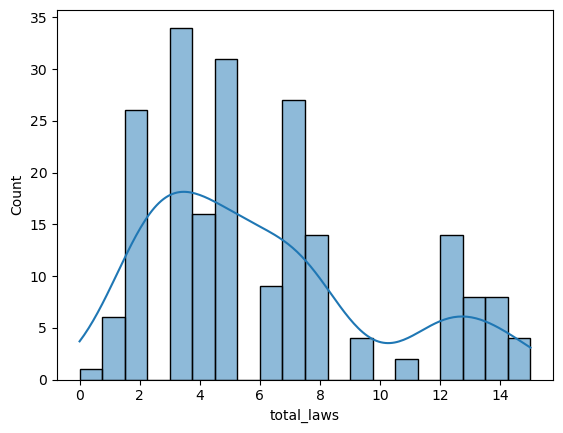

In [17]:
#create histogram to determine categories

data = df['total_laws']

sns.histplot(data, bins = 20, kde = True)


In [18]:
df.groupby(['year', 'total_laws']).size()

year  total_laws
2014  0.0            1
      2.0            7
      3.0           11
      4.0            2
      5.0            8
      6.0            2
      7.0            6
      8.0            4
      9.0            1
      11.0           1
      12.0           3
      13.0           2
      14.0           2
      15.0           1
2015  1.0            1
      2.0            7
      3.0            9
      4.0            3
      5.0            9
      6.0            2
      7.0            6
      8.0            4
      9.0            1
      11.0           1
      12.0           3
      13.0           2
      14.0           2
      15.0           1
2016  1.0            2
      2.0            6
      3.0            8
      4.0            5
      5.0            8
      6.0            2
      7.0            7
      8.0            3
      9.0            1
      12.0           4
      13.0           2
      14.0           2
      15.0           1
2017  1.0            3
      2.0        

In [19]:
#view stats of laws by year

df.groupby('year').total_laws.agg(['min', 'max', 'mean'])

,min,max,mean
year,,,
2014,0.0,15.0,6.000000
2015,1.0,15.0,6.078431
2016,1.0,15.0,6.058824
2017,1.0,15.0,6.098039


In [20]:
#determine 33% quantile by year

df_quantile = df[['year', 'total_laws']]
df_quantile.groupby('year').quantile(q = 0.33, interpolation = 'linear')

,total_laws
year,
2014,3.0
2015,3.5
2016,4.0
2017,4.0


In [21]:
#determine 67% quantile by year

df_quantile.groupby('year').quantile(q = 0.67, interpolation = 'linear')

,total_laws
year,
2014,7.0
2015,7.0
2016,7.0
2017,7.0


In [22]:
#create flag column based on quantiles

df.loc[df['total_laws'] < 4, 'gun_law_strength'] = 'Weak'
df.loc[(df['total_laws'] >= 4) & (df['total_laws'] < 7), 'gun_law_strength'] = 'Average'
df.loc[df['total_laws'] >= 7, 'gun_law_strength'] = 'Strong'
df['gun_law_strength'].value_counts()


Strong     81
Weak       67
Average    56
Name: gun_law_strength, dtype: int64

In [23]:
#view categories of strength by pol party

df.groupby(['state_control', 'gun_law_strength']).size()

state_control  gun_law_strength
Dem            Average              6
               Strong              31
               Weak                 3
Divided        Average             16
               Strong              31
               Weak                20
Rep            Average             34
               Strong              19
               Weak                44
dtype: int64

In [24]:
df.head()

,state,year,state_control,registration_req,open_carry_legal,open_carry_permit_req,permit_req_purchase,felons_may_own,restraining_order_may_own,dv_offender_may_own,violent_offender_may_own,conv_stalker_may_own,dealer_req_license,bg_check_required,concealed_carry_permit_req,guns_on_college_campus,guns_at_elemen_sch,assault_weapon_ban,total_laws,gun_law_strength
0,AL,2014,Rep,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2.0,Weak
1,AK,2014,Rep,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,2.0,Weak
2,AZ,2014,Rep,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,3.0,Weak
3,AR,2014,Divided,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,4.0,Average
4,CA,2014,Dem,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,13.0,Strong


In [25]:
#remove unnecessary cols

df.columns

Index(['state', 'year', 'state_control', 'registration_req',
       'open_carry_legal', 'open_carry_permit_req', 'permit_req_purchase',
       'felons_may_own', 'restraining_order_may_own', 'dv_offender_may_own',
       'violent_offender_may_own', 'conv_stalker_may_own',
       'dealer_req_license', 'bg_check_required', 'concealed_carry_permit_req',
       'guns_on_college_campus', 'guns_at_elemen_sch', 'assault_weapon_ban',
       'total_laws', 'gun_law_strength'],
      dtype='object')

In [26]:
df.drop(columns = ['registration_req',
       'open_carry_legal', 'open_carry_permit_req', 'permit_req_purchase',
       'felons_may_own', 'restraining_order_may_own', 'dv_offender_may_own',
       'violent_offender_may_own', 'conv_stalker_may_own',
       'dealer_req_license', 'bg_check_required', 'concealed_carry_permit_req',
       'guns_on_college_campus', 'guns_at_elemen_sch', 'assault_weapon_ban'], inplace = True)
df.head()

,state,year,state_control,total_laws,gun_law_strength
0,AL,2014,Rep,2.0,Weak
1,AK,2014,Rep,2.0,Weak
2,AZ,2014,Rep,3.0,Weak
3,AR,2014,Divided,4.0,Average
4,CA,2014,Dem,13.0,Strong


## 04. Export DF

In [27]:
df.to_csv(os.path.join(path, 'Data', 'Final Data', 'party_laws.csv'), index = False)